# Model reconstruction of puzzled images from their grayscaled cropped counterparts

In [1]:
# Imports
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import RMSprop, SGD
import keras.backend as K
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import os

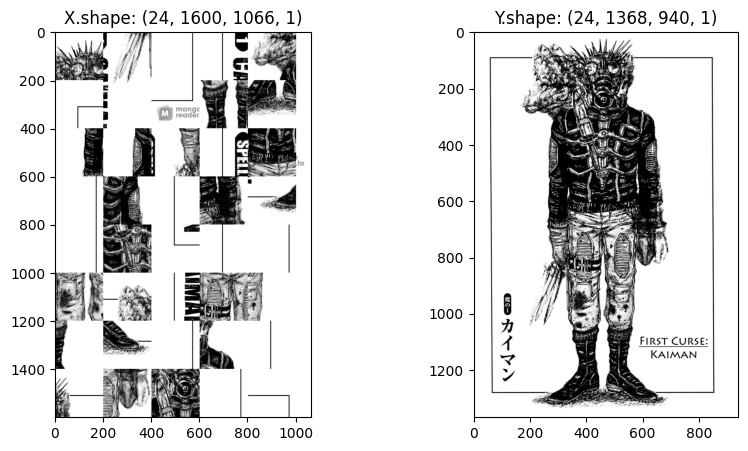

In [2]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), color_mode='grayscale')
        if img is not None:
            img = img_to_array(img)
            img = img.astype('float32') / 255
            images.append(img)
    return np.array(images)

X = load_images('Pixel_Chapter_1')
Y = load_images('True_Chapter_1')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(X[0], cmap='gray')
axs[0].set_title('X.shape: ' + str(X.shape))

axs[1].imshow(Y[0], cmap='gray')
axs[1].set_title('Y.shape: ' + str(Y.shape))

plt.show()

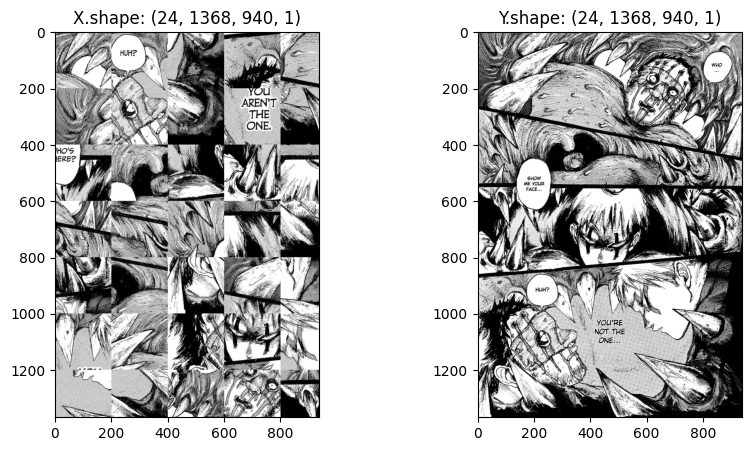

In [3]:
# Crop images to 1368x940, instead of resizing them
def process_image(img):
    img_cropped = img[:1368, :940]
    return img_cropped.reshape(1368, 940, 1)

X = np.array([process_image(x) for x in X])
Y = np.array([process_image(y) for y in Y])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(X[18], cmap='gray')
axs[0].set_title('X.shape: ' + str(X.shape))

axs[1].imshow(Y[18], cmap='gray')
axs[1].set_title('Y.shape: ' + str(Y.shape))

plt.show()

In [ ]:
def divide_into_squares(image, square_size=200):
    # Get the width and height of the image
    height, width = image.shape[:2]
    
    # Calculate the number of squares along each dimension
    num_squares_y = height // square_size
    num_squares_x = width // square_size
    
    # Divide the image into squares
    squares = []
    for i in range(num_squares_y):
        for j in range(num_squares_x):
            square = image[i*square_size:(i+1)*square_size, j*square_size:(j+1)*square_size]
            squares.append(square)
        
        # Create a last square when the width is not a multiple of 200
        if width % square_size != 0:
            square = image[i*square_size:(i+1)*square_size, width-square_size:width]
            squares.append(square)    
    return np.array(squares)

# preprocess images into squares
X_train_squares = np.concatenate([divide_into_squares(x) for x in X_train])
Y_train_squares = np.concatenate([divide_into_squares(y) for y in Y_train])
X_val_squares = np.concatenate([divide_into_squares(x) for x in X_val])
Y_val_squares = np.concatenate([divide_into_squares(y) for y in Y_val])

In [4]:
# Split into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X.astype('float32'), Y.astype('float32'), test_size=0.2, random_state=42)
# # Split into training and validation sets as float16 to save memory
# X_train, X_val, Y_train, Y_val = train_test_split(X.astype('float16'), Y.astype('float16'), test_size=0.2, random_state=42)

In [5]:
# Build a simple autoencoder 
model = Sequential()
model.add(Conv2D(4, (3, 3), padding='same', input_shape=(1368, 940, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='softplus', padding='same'))
# Compile and train the model
# fits the model on batches with real-time data augmentation
model.compile(optimizer=SGD(), loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_val, Y_val))

c:\Users\phili\Projects\Scrape_Manga\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1782 - val_loss: 0.1757
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1761 - val_loss: 0.1744
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1742 - val_loss: 0.1732
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1723 - val_loss: 0.1722
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1706 - val_loss: 0.1712
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1690 - val_loss: 0.1704
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1676 - val_loss: 0.1696
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1662 - val_loss: 0.1689
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1650 - val_loss: 0.1683
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1638 - val_loss: 0.1678
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1628 - val_loss: 0.1674
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1618 - val_loss: 0.1670
Epoch 13/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


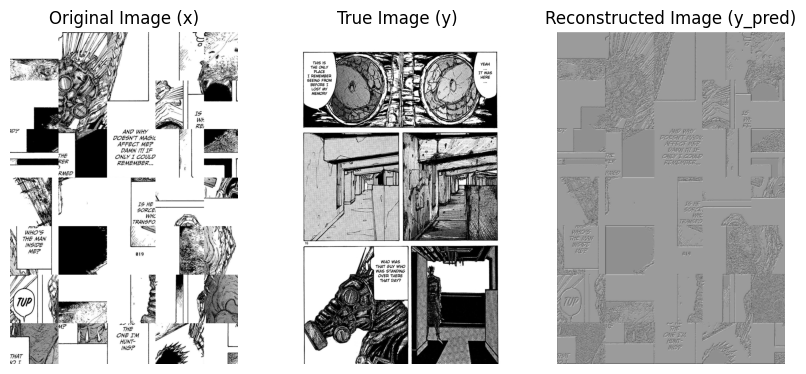

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


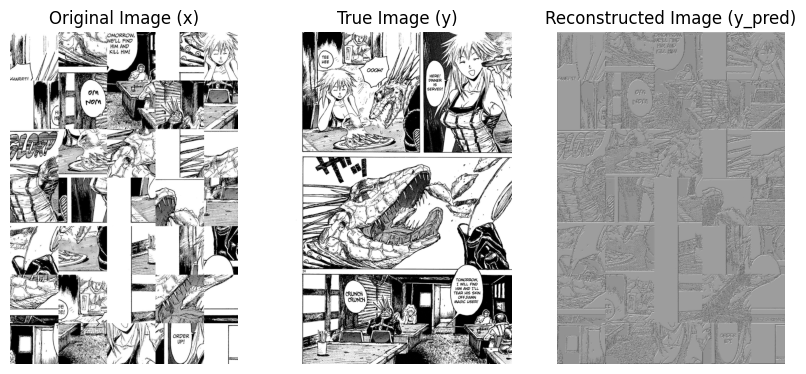

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


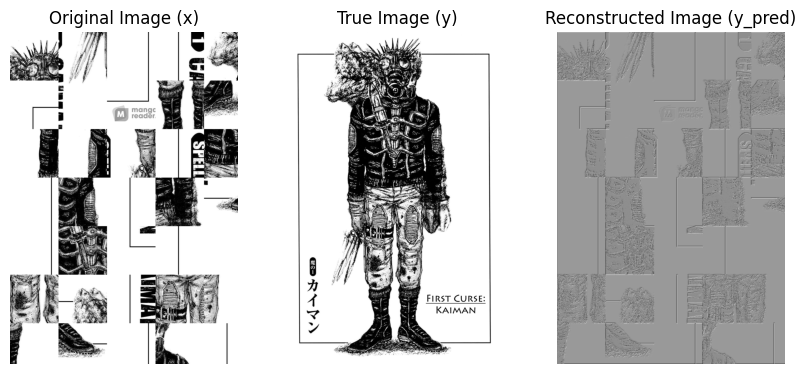

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


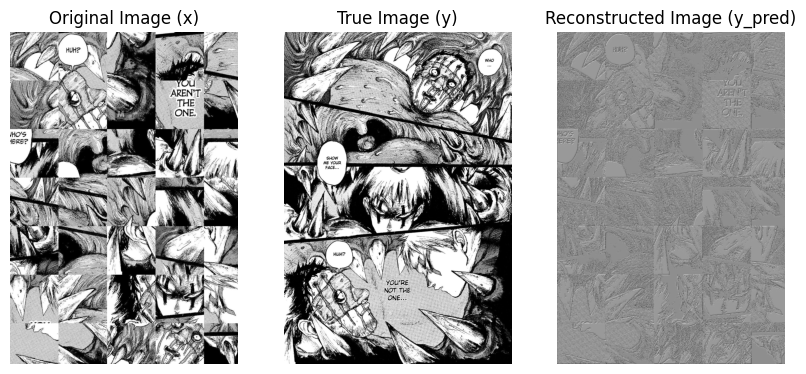

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


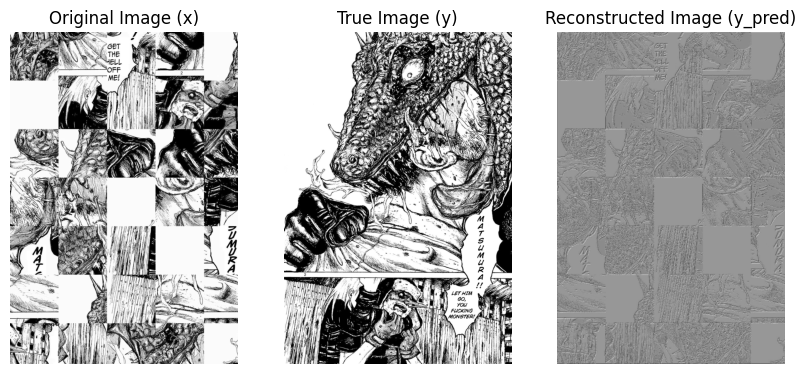

In [38]:
# Show image reconstruction
import matplotlib.pyplot as plt

# display all images and their reconstructions

def display_images(X, Y, model):
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        y_pred = model.predict(x.reshape(1, 1368, 940, 1)).reshape(1368, 940)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(x.reshape(1368, 940), cmap='gray')
        plt.title('Original Image (x)')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(y.reshape(1368, 940), cmap='gray')
        plt.title('True Image (y)')
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.imshow(y_pred, cmap='gray_r')
        plt.title('Reconstructed Image (y_pred)')
        plt.axis('off')
        plt.show()

display_images(X_val, Y_val, model)

In [39]:
def save_images(X_val, Y_val, model):
    predictions = model.predict(X_val)
    num_images = X_val.shape[0]

    with PdfPages('output.pdf') as pdf:
        for i in range(num_images):
            fig, ax = plt.subplots(1, 3, figsize=(20, 5))

            ax[0].imshow(X_val[i].squeeze(), cmap='gray')
            ax[0].set_title('Original Image')

            ax[1].imshow(Y_val[i].squeeze(), cmap='gray')
            ax[1].set_title('Ground Truth')

            ax[2].imshow(predictions[i].squeeze(), cmap='gray')
            ax[2].set_title('Predicted Image')

            for a in ax:
                a.axis('off')

            plt.tight_layout()
            pdf.savefig(fig)  # saves the current figure into a pdf page
            plt.close()

save_images(X_val, Y_val, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


In [8]:
# Evaluate the model
loss = model.evaluate(X_val, Y_val)
print('Validation loss:', loss)

# Save the model
model.save('my_model_4L_RMS.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.1644
Validation loss: 0.16440705955028534
